We want to know what is the acceptable level of error on c_z for SDSS and LSST_DESI such that statistical error dominates the error budget.

In [1]:
%matplotlib inline
import numpy as np; import constrain_IA_BlazekMethod as Bl
import shared_functions_setup as setup
import matplotlib.pyplot as plt

SURVEY= LSST_DESI


/usr/local/lib/python2.7/dist-packages/halotools/sim_manager/halo_table_cache.py:12: UserWarning: Some of the functionality of the HaloTableCache classrequires h5py to be installed.
  warn("Some of the functionality of the HaloTableCache class"
/usr/local/lib/python2.7/dist-packages/halotools/sim_manager/user_supplied_ptcl_catalog.py:13: UserWarning: Most of the functionality of the sim_manager sub-package requires h5py to be installed,
which can be accomplished either with pip or conda
  warn("Most of the functionality of the sim_manager "
/usr/local/lib/python2.7/dist-packages/halotools/sim_manager/download_manager.py:39: UserWarning: Some of the functionality of the DownloadManager requires h5py to be installed,
which can be accomplished either with pip or conda
  warn("Some of the functionality of the DownloadManager requires h5py to be installed,\n"
/usr/local/lib/python2.7/dist-packages/halotools/sim_manager/cached_halo_catalog.py:15: UserWarning: Most of the functionality of the

Loading wgg 1halo term from file.
Loading wgg 2halo term from file.
Loading wgp 1halo term from file
Loading wgp 2halo term from file 
F values have already been computed for this endfile.
SigIA values have already been computed for this endfile.
SigEx values have already been computed for this endfile.
cz values have already been computed for this endfile.
Running, systematic level #1
Running, systematic level #2
Running, systematic level #3
Running, systematic level #4
Running, systematic level #5
Running, systematic level #6
Running, systematic level #7
Running, systematic level #8
Running, systematic level #9
Running, systematic level #10
Running, systematic level #11
Running, systematic level #12
Running, systematic level #13
Running, systematic level #14
Running, systematic level #15
Running, systematic level #16
Running, systematic level #17
Running, systematic level #18
Running, systematic level #19
Running, systematic level #20
Running, systematic level #21
Running, systematic

$\Delta \Sigma = c_z \widetilde{\Delta \Sigma}$. Therefore, ${\rm Cov}(\Delta \Sigma(r_p), \Delta \Sigma(r_p^\prime)= \frac{\sigma^2(c_z)}{c_z^2} \widetilde{\Delta\Sigma}(r_p) \widetilde{\Delta\Sigma}(r_p^\prime) $
Let us suppose that we want the fractional integrated (over $r_p$) error on $\Delta\Sigma$ due to $c_z$ to make up no more than $x\%$ of the total integrated error.

In [2]:
x=0.5 # 50 percent

We want to know for what values of $\frac{\sigma(c_z)}{c_z}$ is it true that $\frac{N/S_{\rm sys}}{N/S_{\rm tot}}\le x$ where $N/S$ is the integrated inverse signal to noise over $r_p$ scales. Let's assume that the covariance of the 'B' source sample galaxy galaxy lensing is characteristic of a typical lensing measurement we would want to make.

In [3]:
#Get the statistical covariance matrix and statistical only signal to noise
SURVEY = 'LSST_DESI'
if (SURVEY=='SDSS'):
    import params as pa
elif (SURVEY=='LSST_DESI'):
    import params_LSST_DESI as pa
else:
    print "We don't have support for that survey yet; exiting."
    exit()

cov_DS_stat_LSST = np.loadtxt('./txtfiles/covmats/cov_DelSig_zLext_LSST_DESI_sample=B_rpts2000_lpts100000_deltaz=0.1_HOD_fully_updated.txt')

Get the theoretical $\Delta \Sigma$ from lensing only and then the estimated $\widetilde{\Delta \Sigma}$ from the fiducial values of $c_z^b$.

In [4]:
rp_bins  = setup.setup_rp_bins(pa.rp_min, pa.rp_max, pa.N_bins)
rp_cent  = setup.rp_bins_mid(rp_bins)
DeltaSig = Bl.get_DeltaSig_theory(rp_bins, rp_cent)
(cz_a_fid, cz_b_fid) = np.loadtxt('./txtfiles/cz/cz_afid_bfid_extl_survey=LSST_DESI_deltaz=0.1_HOD_fully_updated.txt', unpack=True)
EstDeltaSig = np.asarray(DeltaSig) / cz_b_fid 

Get the square of the statistical-only signal to noise

In [5]:
# Statistical only signal-to-noise
stat_StoNsq = np.dot(DeltaSig, np.dot(np.linalg.inv(cov_DS_stat_LSST), DeltaSig))

Get the covariance matrix due to systematic error on cz for a variety of $\frac{\sigma(c_z)}{c_z}$ values. Combine with the statistical covariance matrix to get the total matrix, and from there get the signal to noise due to systematic error on $c_z$ and $\frac{N/S_{\rm sys}}{N/S_{\rm tot}}$ for each value of $\frac{\sigma(c_z)}{c_z}$.

In [6]:
frac_err_sys = np.zeros(len(pa.fudge_frac_level))
for fi in range(0, len(pa.fudge_frac_level)):
    cov_DS_sys_LSST = np.zeros((len(rp_cent), len(rp_cent)))
    for rpi in range(0,len(rp_cent)):
        for rpj in range(0,len(rp_cent)):
            cov_DS_sys_LSST[rpi, rpj] = pa.fudge_frac_level[fi]**2 * DeltaSig[rpi] * DeltaSig[rpj]
            
            
    cov_tot = cov_DS_sys_LSST + cov_DS_stat_LSST
    StoN_tot_sq = np.dot(DeltaSig, np.dot(np.linalg.inv(cov_tot), DeltaSig))
    NtoS_sys = np.sqrt( StoN_tot_sq**(-1) - stat_StoNsq**(-1))
    frac_err_sys[fi] = NtoS_sys / (np.sqrt(StoN_tot_sq)**(-1))

Plot this as a function of $\frac{\sigma(c_z)}{c_z}$ to see where it crosses $x$. (Points part the turnover at high $\frac{\sigma(c_z)}{c_z}$ cannot be trusted due to matrix inversion difficulties.

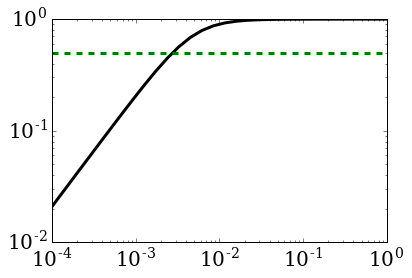

In [7]:
plt.figure()
plt.loglog(pa.fudge_frac_level, frac_err_sys, 'k', linewidth=3)
plt.hold(True)
plt.axhline(x, color='g', linestyle='--', linewidth=3)
plt.show()

For LSST, the maximum level of $\frac{\sigma(c_z)}{c_z}$ allowed for systematic error from this source to make up at most 50\% of the integrated inverse signal to noise of the lensing signal is about 0.002.

Get $\sigma_{\rm sysz} / \sigma_{\rm stat}$ for each quantity taking this maximum level.

In [ ]:
# Compute the squared StoN value from the statistical value by running constrain_IA_Blazekmethod.py
StoNsq_sys = 6441. 
#Load  the statistical signal-to-noise * on gammaIA * (different from above)
StoNstat_sq = np.loadtxt('./txtfiles/StoN/StoNstat_Blazek_LSST_DESI_deltaz=0.1_rlim=25.3_HODupdate.txt')


In [ ]:
ratio = np.sqrt(StoNstat_sq  / StoNsq_sys)

In [ ]:
print "ratio=", ratio